## Install libraries (only needed once)

In [33]:
%pip install pandas
%pip install missingno matplotlib
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 1. 📥 Data load and exploration

- Dataset visualization
- Count of null values and unique values for each variable
- Removal of constant columns or low importance

In [34]:
import pandas as pd

# Load dataset
df = pd.read_csv("dataset/mushrooms.csv")

# Dataset content
print("Dataset content:")
display(df)

# Dataset basic info
print("Dataset info:")
display(df.info())

Dataset content:


,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8411,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BROWN,CLUSTERED,LEAVES
8412,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,SEVERAL,LEAVES
8413,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,ORANGE,CLUSTERED,LEAVES
8414,EDIBLE,KNOBBED,SMOOTH,BROWN,NO,NONE,ATTACHED,CLOSE,BROAD,BROWN,...,SMOOTH,ORANGE,ORANGE,PARTIAL,BROWN,ONE,PENDANT,BUFF,SEVERAL,LEAVES


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises                   8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-colo

None

In [35]:
# Count null values and unique values for each variable.
print("\t\t\tNull values\tUnique values")
for column in df.columns:
    unique_count = df[column].nunique()
    null_count = df[column].isnull().sum()
    spaces = " " * (26 - len(column))
    print(f"{column}{spaces}{null_count}\t\t  {unique_count}")

			Null values	Unique values
edible                    0		  2
cap-shape                 0		  6
cap-surface               0		  4
cap-color                 0		  10
bruises                   0		  2
odor                      0		  9
gill-attachment           0		  2
gill-spacing              0		  2
gill-size                 0		  2
gill-color                0		  12
stalk-shape               0		  2
stalk-root                0		  5
stalk-surface-above-ring  0		  4
stalk-surface-below-ring  0		  4
stalk-color-above-ring    0		  9
stalk-color-below-ring    0		  9
veil-type                 0		  1
veil-color                0		  4
ring-number               0		  3
ring-type                 0		  5
spore-print-color         0		  9
population                0		  6
habitat                   0		  7


From the results above, we can remove `veil-type` as it has only one unique value (is a constant). We're going to use mutual information clasiffication to determine the importance of the variables.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [36]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder

def mutual_info_classifier(df, threshold=0.05):
    # Create dataframes for dependent and independent variables
    y = df['edible']
    X = df.drop(columns=['edible'])

    # Encode ALL categorical data to numerical integers
    # Mutual Information requires numerical input. OrdinalEncoder is suitable here.
    encoder = OrdinalEncoder()
    X_encoded = encoder.fit_transform(X)
    y_encoded = encoder.fit_transform(y.to_frame()) # Encode the target as well (e.g., 'e'=0, 'p'=1)

    print("Shape of Encoded Features (X):", X_encoded.shape)

    # Calculate MI scores. The higher the score, the more predictive the feature is.
    mi_scores = mutual_info_classif(X_encoded, y_encoded.ravel(), random_state=42)

    # Create a Series for easy viewing and sorting
    feature_names = X.columns
    mi_results = pd.Series(mi_scores, index=feature_names).sort_values(ascending=False)

    print("\nMutual Information Scores (Higher is Better):\n")
    print(mi_results)

    # Set a low MI threshold for discarding
    mi_threshold = threshold

    # Identify features to keep
    features_to_keep = mi_results[mi_results > mi_threshold].index.tolist()
    features_to_discard = mi_results[mi_results <= mi_threshold].index.tolist()

    print(f"\n--- Discarding Decision ---")
    print(f"Features to KEEP (Score > {mi_threshold}): {features_to_keep}")
    print(f"Features to DISCARD (Score <= {mi_threshold}): {features_to_discard}")

    # Final DataFrame with discarded columns
    df_final = df.drop(columns=features_to_discard)
    print("\nFinal DataFrame Columns:", df_final.columns.tolist())
    print(f"Dataset reduced from {len(df.columns)} to {len(df_final.columns)} variables")

    return df_final

df_final = mutual_info_classifier(df)

Shape of Encoded Features (X): (8416, 22)

Mutual Information Scores (Higher is Better):

odor                        0.629081
spore-print-color           0.335867
gill-color                  0.279796
ring-type                   0.204542
stalk-surface-above-ring    0.202200
stalk-surface-below-ring    0.200425
stalk-color-above-ring      0.180596
stalk-color-below-ring      0.172646
gill-size                   0.157502
population                  0.151460
bruises                     0.115199
habitat                     0.109911
stalk-root                  0.097487
gill-spacing                0.082754
cap-color                   0.033050
cap-shape                   0.032296
ring-number                 0.031739
cap-surface                 0.026745
veil-color                  0.024984
gill-attachment             0.012983
stalk-shape                 0.010136
veil-type                   0.000000
dtype: float64

--- Discarding Decision ---
Features to KEEP (Score > 0.05): ['odor', 'spore-pri

Let's have a look to the comparison of the dependent variable vs the independent variables:

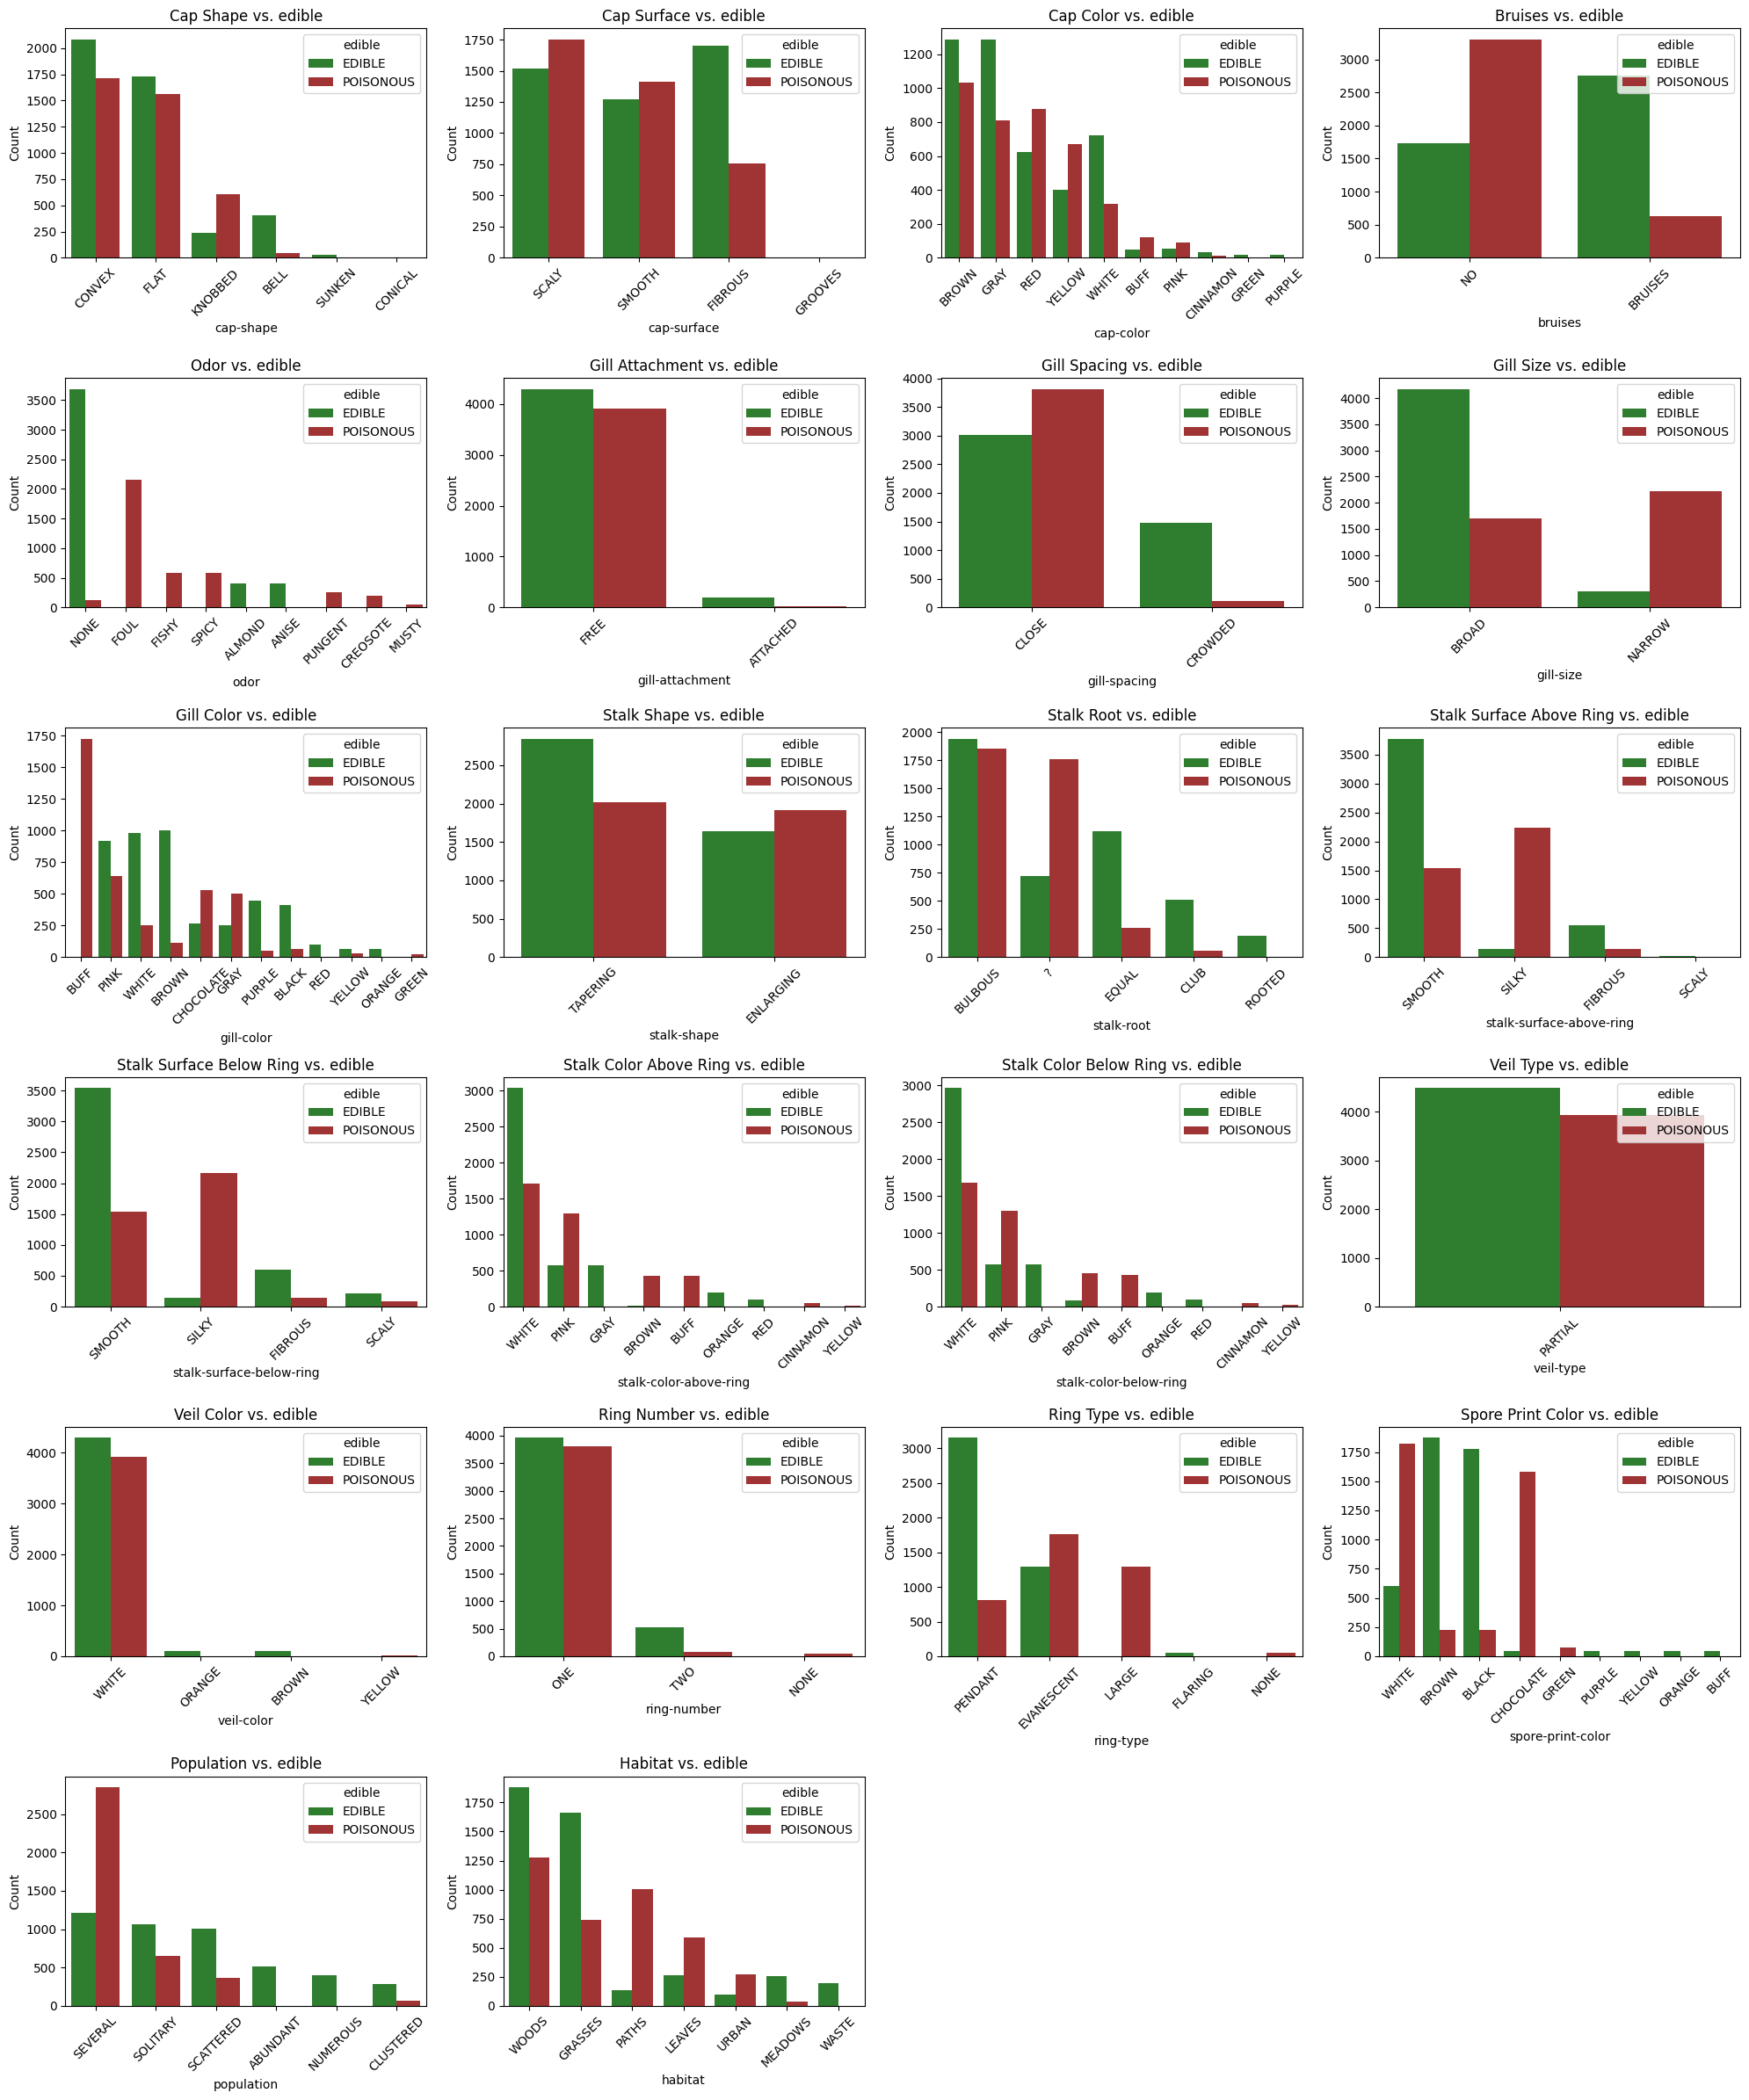

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_feature_vs_class_plots(df, target):
    if 'KMeans_Cluster' in df.columns:
        df = df.drop(columns=['KMeans_Cluster'])

    X = df.drop(columns=[target])
    y = df[target]

    # Set up the figure size for better viewing
    n_features = len(X.columns)
    
    # We'll plot 4 charts per row
    rows = (n_features + 3) // 4
    fig, axes = plt.subplots(rows, 4, figsize=(20, 4 * rows))
    axes = axes.flatten() # Flatten the 2D array of axes for easy indexing
    
    # Define the color palette
    palette = {'EDIBLE': 'forestgreen', 'POISONOUS': 'firebrick'}

    # 2. Iterate and Create Count Plots
    for i, column in enumerate(X):
        if i < len(axes): # Ensure we don't go out of bounds
            ax = axes[i]
            # Use sns.countplot for categorical vs categorical visualization
            sns.countplot(
                x=column, 
                hue=target, 
                data=df, 
                palette=palette,
                order=df[column].value_counts().index, # Order bars by count
                ax=ax
            )
            ax.set_title(f'{column.replace("-", " ").title()} vs. {target}')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45) # Rotate x-labels for readability
            ax.legend(title=target, loc='upper right')

    # 3. Clean up and Display
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

# Execute the function
create_feature_vs_class_plots(df, 'edible')

Looking at the graphs, we can see that `odor` is almost enough by itself to determine if a mushroom is edible or not.

## 2. 🧼 Preprocessing

- Missing values.
- Use One-hot encoder with categoric variables.
- Separation of X (independent variables) and y (dependent variable).

On previous step, we already saw that there are no missing values, so we're going to skip this step. We'll first create the X and y dataframes and create the train and test dataframes before using one-hot encoding. We'll be using `df_final` as the source dataset, since it is the one with the reduce variables.

In order to make the code reusable. we're going to create a method that will do the encoding using OneHotEncoder.

In [37]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(df_model, target):
    X = df_model.drop(columns=[target])
    y = df_model[target]


    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

    one_hot_encoder.fit(X)

    X_encoded = one_hot_encoder.transform(X)
    
    return X_encoded, y

X, y = one_hot_encoding(df, 'edible')


## 3. 🧪 PCA (Principal Component Analysis)

We use PCA to reduce the amount of independent variables (X). We must take into consideration that for a dataset with this many independent variables, the smaller is the set, the smaller is going to be the precission.

For the mushroom dataset, reducing the independent variables to 2 captures only about 18% of the information of the dataset. That means that about 82% of the dataset is not going to be explained if we reduce the independent variables to 2.

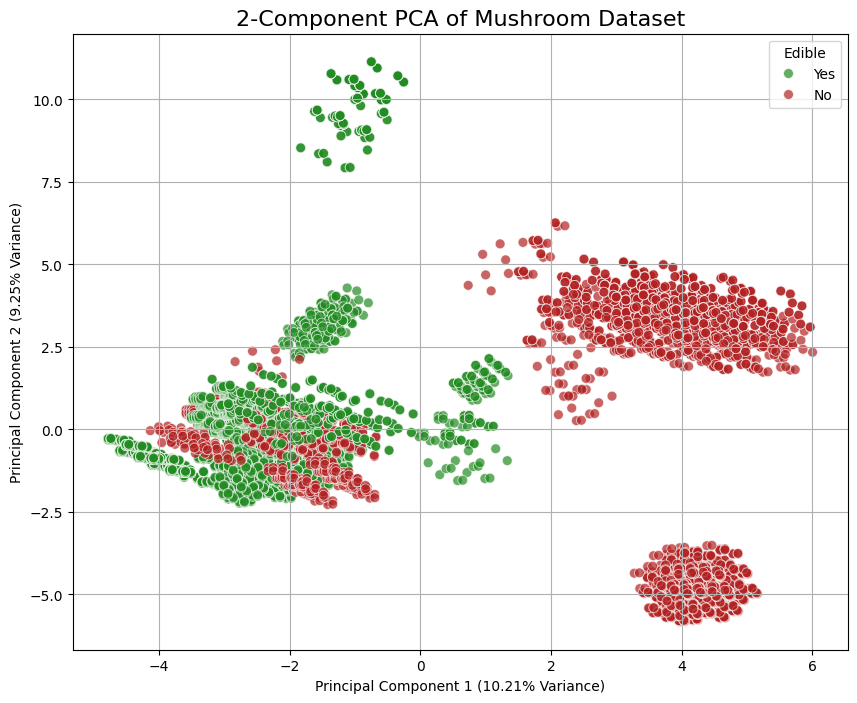

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def pca(X, pca_value=.95):
    temp_pca = PCA(n_components=pca_value)
    pca_pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', temp_pca) 
    ])

    X_pca = pca_pipeline.fit_transform(X)

    return temp_pca, X_pca

X, y = one_hot_encoding(df, target='edible')
temp_pca, X_pca = pca(X, 2)

# Create a dataframe with the PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['edible'] = y

# Display the PCA dataframe
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='edible',
    data=df_pca,
    palette={'EDIBLE': 'forestgreen', 'POISONOUS': 'firebrick'},
    s=50,
    alpha=0.7
)
plt.title('2-Component PCA of Mushroom Dataset', fontsize=16)
plt.xlabel(f'Principal Component 1 ({temp_pca.explained_variance_[0]:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({temp_pca.explained_variance_[1]:.2f}% Variance)')
# Get the right colors for the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, title='Edible', labels=['Yes', 'No'])
plt.grid(True)
plt.show() 
# plt.savefig('mushroom_pca_2d.png') # Use this to save the plot

## 4.🌳 Supervised classification (Random Forest)

So far we have 3 datasets:
- `df`. The original dataset (no changes).
- `df_final`. The dataset with an optimized set of independent variables (Mutual Information Classification)
- `df_pca`. The dataset with only two independent variables after using PCA.

We will train the datasets using Random Forest and compare the results.

Shape of Encoded Features (X): (8416, 23)

Mutual Information Scores (Higher is Better):

odor                        0.627953
KMeans_Cluster              0.626695
spore-print-color           0.336163
gill-color                  0.285978
ring-type                   0.205280
stalk-surface-above-ring    0.201578
stalk-surface-below-ring    0.192851
stalk-color-above-ring      0.184775
stalk-color-below-ring      0.165169
gill-size                   0.158585
population                  0.149336
habitat                     0.114265
bruises                     0.102718
stalk-root                  0.101059
gill-spacing                0.088005
cap-color                   0.036113
cap-shape                   0.029538
ring-number                 0.024061
cap-surface                 0.021568
veil-color                  0.014315
veil-type                   0.009426
stalk-shape                 0.008717
gill-attachment             0.001150
dtype: float64

--- Discarding Decision ---
Features to KEE

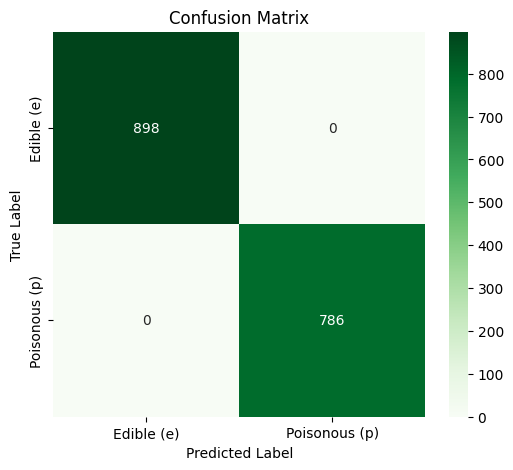

Training dataset after using Mutual Info Classifier:
Starting Random Forest model training...
Training complete.

--- Model Evaluation ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

   Edible (e)       1.00      1.00      1.00       898
Poisonous (p)       1.00      1.00      1.00       786

     accuracy                           1.00      1684
    macro avg       1.00      1.00      1.00      1684
 weighted avg       1.00      1.00      1.00      1684



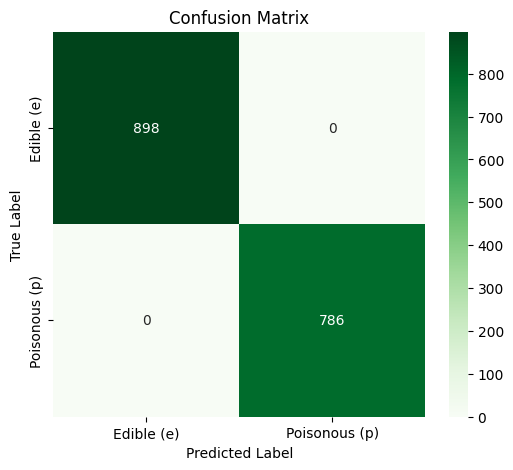

Special case. We're going to use odor as the only independent variable:
Starting Random Forest model training...
Training complete.

--- Model Evaluation ---
Accuracy: 0.9887

Classification Report:
               precision    recall  f1-score   support

   Edible (e)       0.98      1.00      0.99       898
Poisonous (p)       1.00      0.98      0.99       786

     accuracy                           0.99      1684
    macro avg       0.99      0.99      0.99      1684
 weighted avg       0.99      0.99      0.99      1684



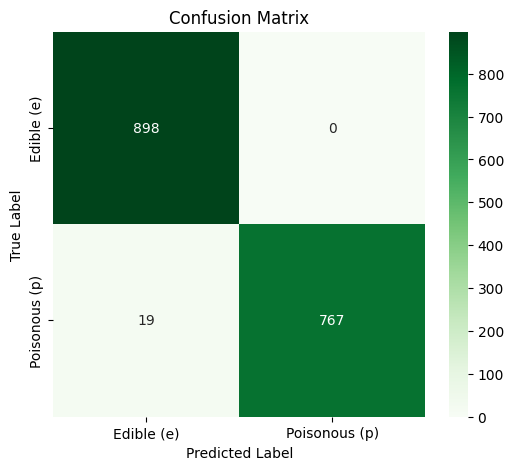

Special case. Variable odor removed:
Starting Random Forest model training...
Training complete.

--- Model Evaluation ---
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

   Edible (e)       1.00      1.00      1.00       898
Poisonous (p)       1.00      1.00      1.00       786

     accuracy                           1.00      1684
    macro avg       1.00      1.00      1.00      1684
 weighted avg       1.00      1.00      1.00      1684



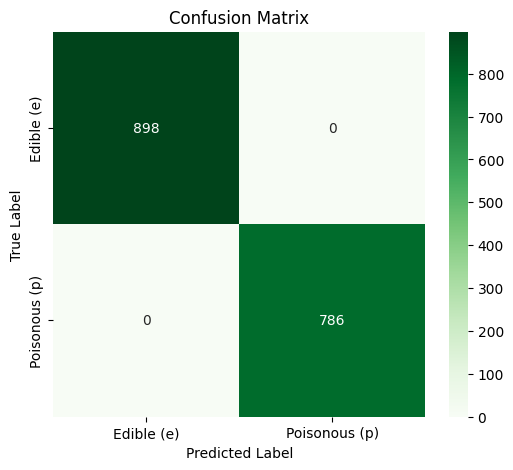

Training dataset after PCA:
Starting Random Forest model training...
Training complete.

--- Model Evaluation ---
Accuracy: 0.5344

Classification Report:
               precision    recall  f1-score   support

   Edible (e)       0.53      1.00      0.70       898
Poisonous (p)       1.00      0.00      0.01       786

     accuracy                           0.53      1684
    macro avg       0.77      0.50      0.35      1684
 weighted avg       0.75      0.53      0.37      1684



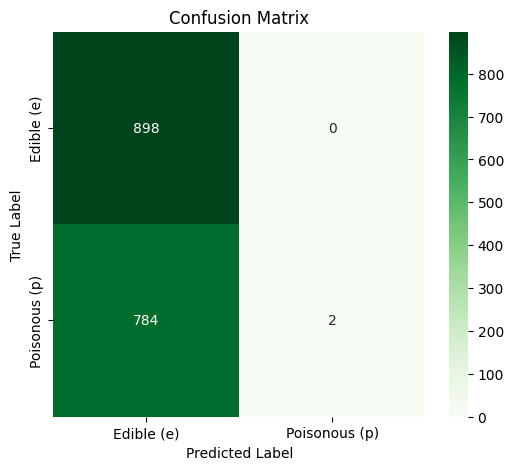

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_random_forest(df, target):
    X = df.drop(columns=[target], axis= 1)
    y = df[target]
    categorical_features = X.columns.to_list()
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ],
        remainder='passthrough'
    )
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(
            n_estimators=100,      # Number of trees in the forest
            criterion='gini',      # Metric for split quality
            random_state=42,
            n_jobs=-1              # Use all available cores
        ))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

    print("Starting Random Forest model training...")
    model_pipeline.fit(X_train, y_train)
    print("Training complete.")

    y_pred = model_pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("\n--- Model Evaluation ---")
    print(f"Accuracy: {accuracy:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Edible (e)', 'Poisonous (p)']))

    cm = confusion_matrix(y_test, y_pred, labels=['EDIBLE', 'POISONOUS'])
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Greens',
        xticklabels=['Edible (e)', 'Poisonous (p)'],
        yticklabels=['Edible (e)', 'Poisonous (p)']
    )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

df_mic = mutual_info_classifier(df, 0.1)

print("Training the whole dataset:")
train_random_forest(df, 'edible')

print("Training dataset after using Mutual Info Classifier:")
train_random_forest(df_mic, 'edible')

print("Special case. We're going to use odor as the only independent variable:")
df_odor=df[['edible', 'odor']]
train_random_forest(df_odor, 'edible')

print("Special case. Variable odor removed:")
df_no_odor=df.drop(columns=['odor'])
train_random_forest(df_no_odor, 'edible')


print("Training dataset after PCA:")
train_random_forest(df_pca, 'edible')



Results shows an accuracy of 100% all the modeles except PCA. This is possible because this dataset is an example of a dataset where he data can be almost perfectly separated (in fact, which just the variables 'odor' and 'spore-print-color' is possible te get an almost perfect score).

**NOTE**. We have included two special cases: One where the only independent variable is `odor`, and another one without the `odor` variable. The results show a precission of 0.99 when the only independent variable is `odor`, which is pretty good. If we remove `odor` from the dataset, it makes no diffence to the precission, as is still 1.

## 5. K-Means clustering

The Silhouette Scores for k=2 to k=2: [0.10892931048584795]
The optimal number of clusters (Silhouette Score): 2


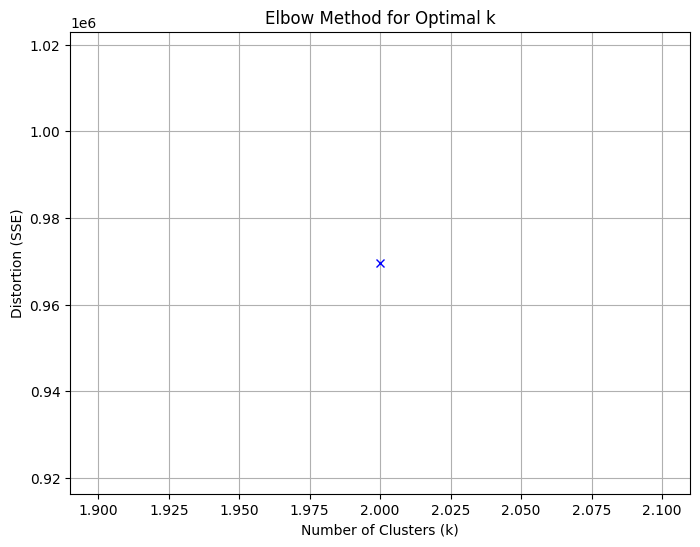

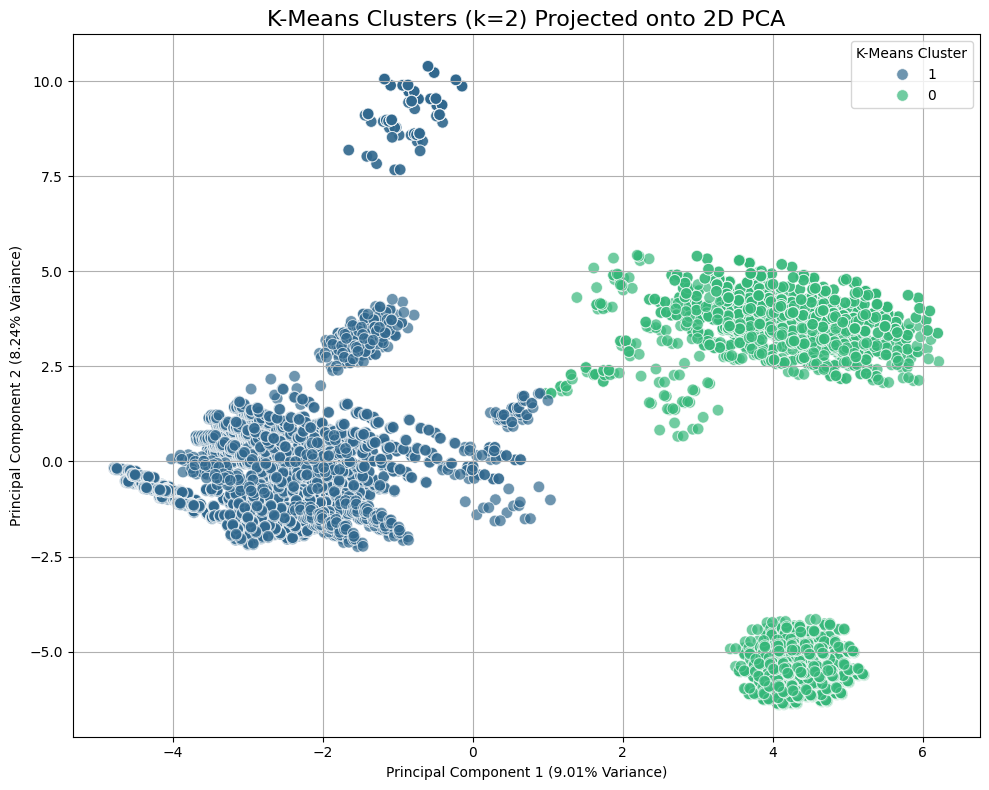


Contingency Table (True Class vs. K-Means Cluster):
 KMeans_Cluster     0     1
edible                    
EDIBLE            22  4466
POISONOUS       3112   816

Overall K-Means Cluster Purity (compared to True Class): 0.9004
Number of clusters (K): 2
Davies-Bouldin Index (DBI): 2.7949


In [80]:
import numpy as np
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


def k_means(df_temp, target, iterations):
    X = df_temp.drop(columns=[target])
    y = df_temp[target]

    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_encoded = one_hot_encoder.fit_transform(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

    distortions = []
    silhouette_scores = []
    K = range(2, iterations + 1) # Test
    for k in K:
        kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
        # kmeans_model.fit(X_scaled)
        cluster_labels = kmeans_model.fit_predict(X_scaled)
        distortions.append(kmeans_model.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

    # Find the k that gave the maximum score
    max_score_index = np.argmax(silhouette_scores)
    optimal_k_silhouette = K[max_score_index]

    print(f"The Silhouette Scores for k=2 to k={iterations}: {silhouette_scores}")
    print(f"The optimal number of clusters (Silhouette Score): {optimal_k_silhouette}")
    n_clusters = optimal_k_silhouette

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show() # In a local environment
    # plt.savefig('kmeans_elbow_method.png')

    # K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    df_temp['KMeans_Cluster'] = kmeans.labels_

    # Dimensionality Reduction for Visualization (PCA)
    pca = PCA(n_components=n_clusters)
    principal_components = pca.fit_transform(X_scaled)
    columns = []
    for i in range(1, n_clusters + 1):
        columns.append(f"PC{i}")
    pca_df = pd.DataFrame(data=principal_components, columns=columns)
    pca_df['KMeans_Cluster'] = df_temp['KMeans_Cluster'].astype(str)
    pca_df['True_Class'] = y # Include true class for comparison

    # Visualization of K-Means Clusters
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='PC1',
        y='PC2',
        hue='KMeans_Cluster',
        data=pca_df,
        palette='viridis',
        s=70,
        alpha=0.7
    )

    explained_variance = pca.explained_variance_ratio_
    plt.title(f'K-Means Clusters (k={n_clusters}) Projected onto 2D PCA', fontsize=16)
    plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)')
    plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)')
    plt.legend(title='K-Means Cluster')
    plt.grid(True)
    plt.tight_layout()
    plt.show() # In a local environment
    # plt.savefig('kmeans_pca_cluster_plot.png')

    # Cluster Purity Check 
    contingency_table = pd.crosstab(y, df_temp['KMeans_Cluster'])
    print("\nContingency Table (True Class vs. K-Means Cluster):\n", contingency_table)

    cluster_purity = np.sum(np.max(contingency_table.values, axis=0)) / contingency_table.values.sum()
    print(f"\nOverall K-Means Cluster Purity (compared to True Class): {cluster_purity:.4f}")

    y_clusters = kmeans_model.fit_predict(X_scaled)
    dbi_score = davies_bouldin_score(X_scaled, y_clusters)

    print(f"Number of clusters (K): {n_clusters}")
    print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f}")

    df_temp.drop(columns=['KMeans_Cluster'])
k_means(df, 'edible', 2)

Since we're expecting only two values (edible or poisonius), we could think that the optimal value for k-means should be 2, right? 

You can see above the results for k=2, and bellow the results for k=9 (k is determined using the shiluette method). The "purity" increases from .87 to .95. This does not mean k=9 is better that k=2, but indicates that it has found complex substructures within the two main classes due to one-hot-encoding. DBI indicates that k=9 is an optimal choice if you want to train a model using knn.

For the time being, we're going to use k=2 since is the logical choice.

The Silhouette Scores for k=2 to k=10: [0.12257642035437857, 0.1266578567693094, 0.16390455146470978, 0.1680355890898333, 0.21320355930477466, 0.19074422145726846, 0.21274962113521828, 0.23391859119946534, 0.23345626929836355]
The optimal number of clusters (Silhouette Score): 9


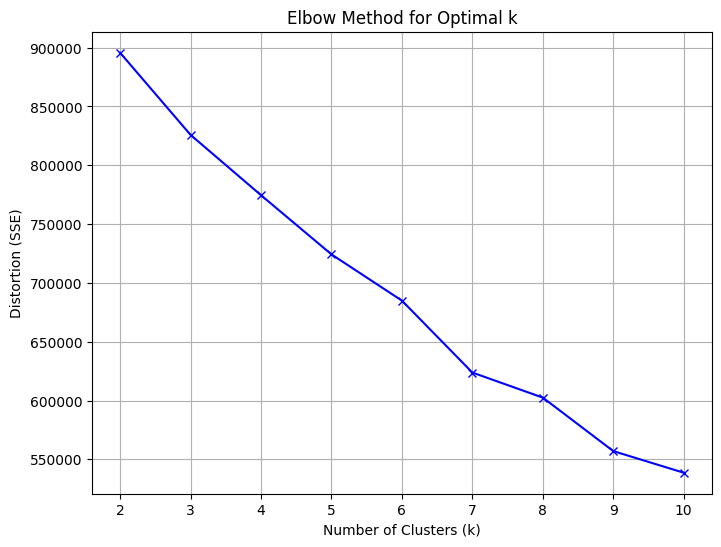

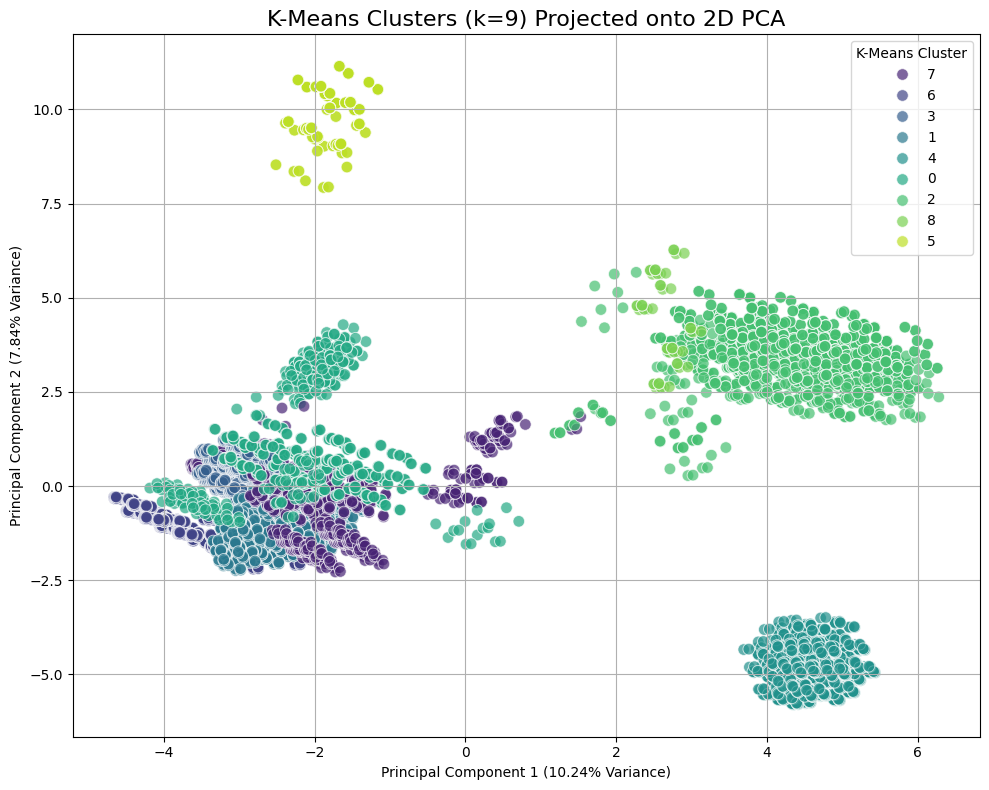


Contingency Table (True Class vs. K-Means Cluster):
 KMeans_Cluster    0     1     2     3     4    5    6    7   8
edible                                                        
EDIBLE          528  1728    19  1024     0  192  704  293   0
POISONOUS        76     0  1768     0  1296    0    0  740  48

Overall K-Means Cluster Purity (compared to True Class): 0.9539
Number of clusters (K): 9
Davies-Bouldin Index (DBI): 1.6462


In [81]:
k_means(df, 'edible', 10)